# About the Data
 
 

Age:Age of the patient [years]</font>

Sex: Sex of the patient [M: Male, F: Female]</font>

ChestPainType:Ch Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]</font>

RestingBP: Resting blood pressure [mm Hg]</font>

Cholesterol: Serum cholesterol [mm/dl]</font>

FastingBS: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]</font>

RestingECG: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]</font>

MaxHR: Maximum heart rate achieved [Numeric value between 60 and 202]</font>

ExerciseAngina:Exercise-induced angina [Y: Yes, N: No]</font>

Oldpeak: Oldpeak = ST [Numeric value measured in depression]</font>

ST_Slope:The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]</font>

HeartDisease: Output class [1: heart disease, 0: Normal]</font>

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from matplotlib import rcParams
from matplotlib.cm import rainbow

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


# Data Collection

In [2]:
data = pd.read_csv("heart.csv")
data.shape # Number of rows and columns in this Dataset

(918, 12)

In [3]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
data.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [5]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Data Cleaning

In [7]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
def print_null_data(data):
    null_count = data.isna().sum()
    null_percent = data.isna().sum() / len(data)
    null_percent = null_percent.apply(lambda x: f"{x:.1%}")
    print("Duplicated total data:", data.duplicated().sum())
    result = pd.concat([null_count, null_percent], axis=1)
    result.columns = ['Null Data Count', 'Null Percentage Data']
    return result
print_null_data(data)

Duplicated total data: 0


,Null Data Count,Null Percentage Data
Age,0,0.0%
Sex,0,0.0%
ChestPainType,0,0.0%
RestingBP,0,0.0%
Cholesterol,0,0.0%
FastingBS,0,0.0%
RestingECG,0,0.0%
MaxHR,0,0.0%
ExerciseAngina,0,0.0%
Oldpeak,0,0.0%


## Data Exploration and Visualization

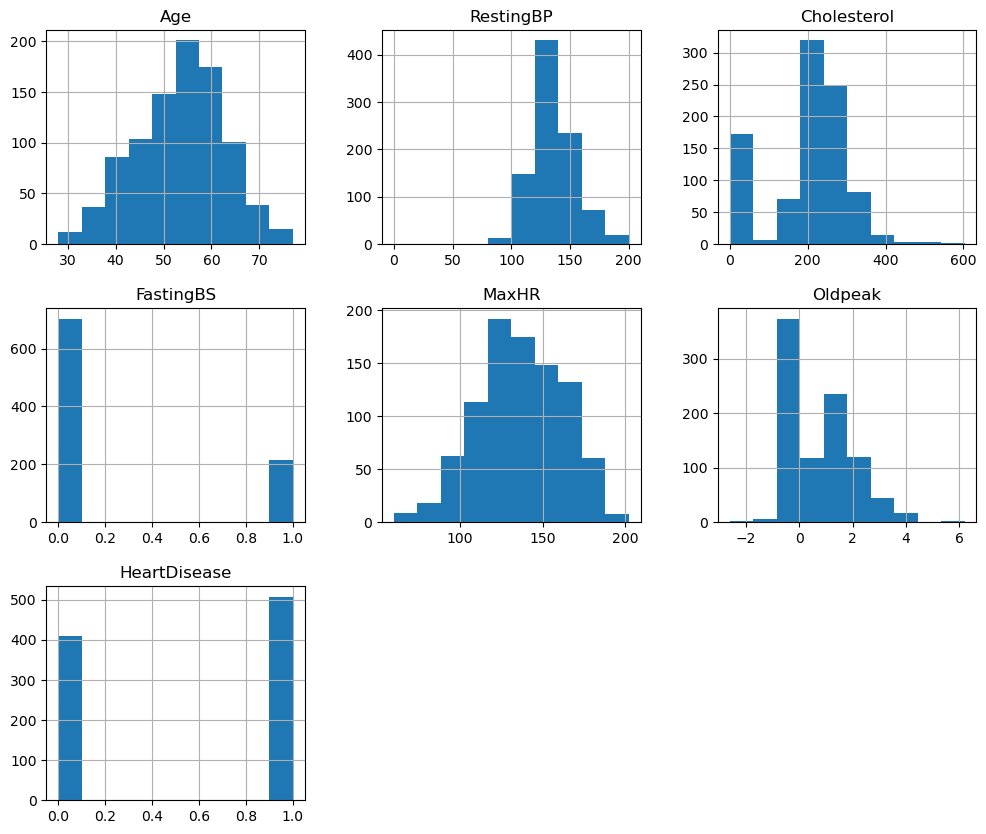

In [9]:
data.hist(figsize=(12,10))
plt.show()

------------------------------
Variable:  {'Age'}
Skew = -0.19593302867569365
Kurtosis = -0.3861396123864571


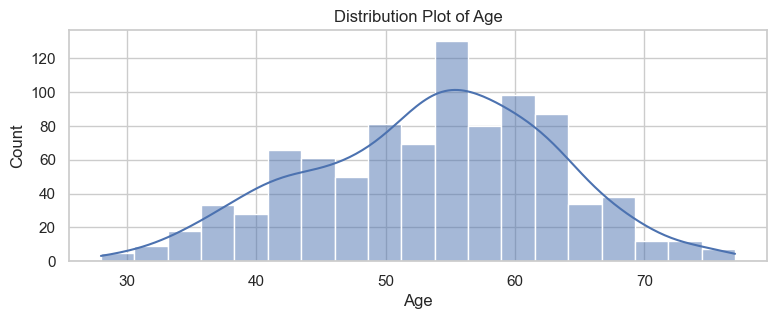

------------------------------
Variable:  {'RestingBP'}
Skew = 0.1798393100516288
Kurtosis = 3.2712509168295356


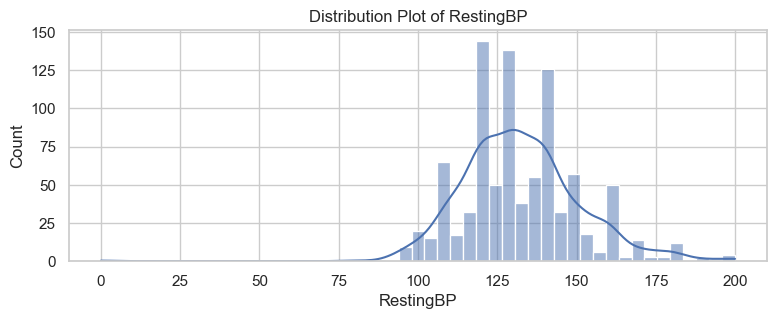

------------------------------
Variable:  {'Cholesterol'}
Skew = -0.6100864307268192
Kurtosis = 0.11820846851766742


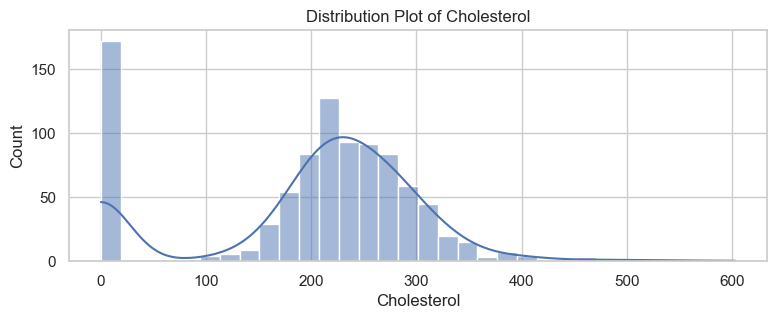

------------------------------
Variable:  {'FastingBS'}
Skew = 1.2644841750727027
Kurtosis = -0.40196025517466216


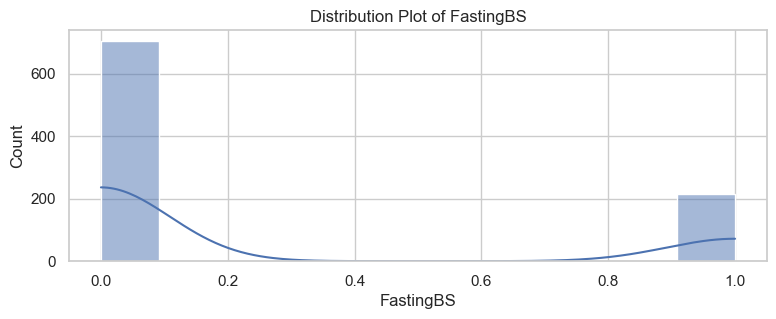

------------------------------
Variable:  {'MaxHR'}
Skew = -0.14435941846180994
Kurtosis = -0.4482478199521531


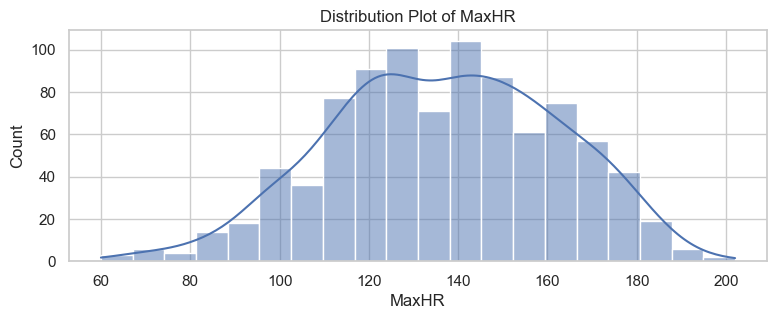

------------------------------
Variable:  {'Oldpeak'}
Skew = 1.0228720218107528
Kurtosis = 1.2030636840120112


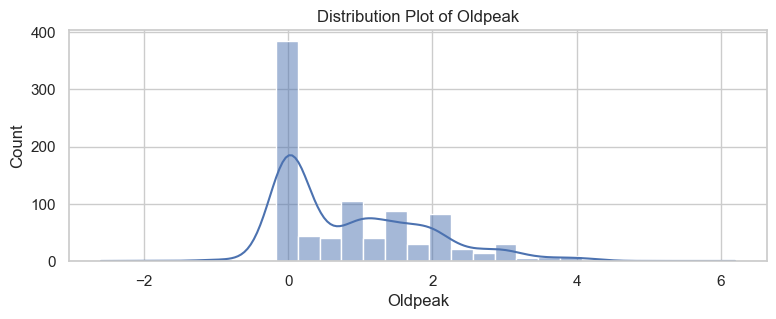

------------------------------
Variable:  {'HeartDisease'}
Skew = -0.21508633825088655
Kurtosis = -1.9580084425329685


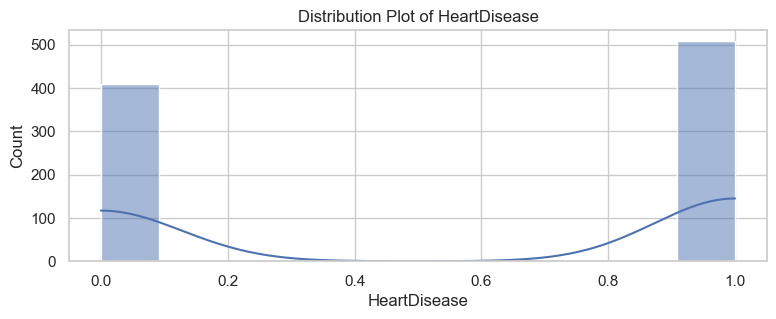

In [10]:
cols_num = data.select_dtypes(include = ['float','int']).columns.to_list()
for col in cols_num:
    sns.set(style='whitegrid')
    plt.figure(figsize=(9, 3))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution Plot of {col}')
    print('--' * 15)
    print("Variable: ", {col})
    print(f'Skew = {data[col].skew()}')
    print(f'Kurtosis = {data[col].kurt()}')
    plt.show()

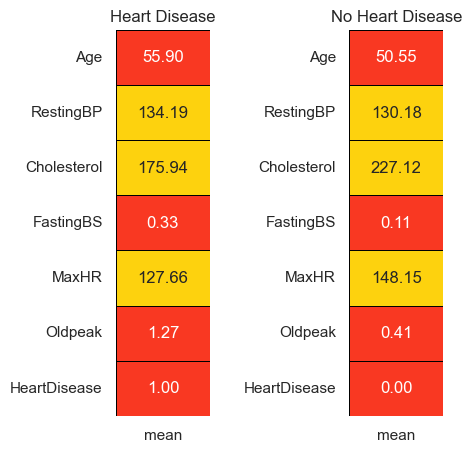

In [11]:
# Heatmap comparing features for patients with and without heart disease
yes = data[data['HeartDisease'] == 1].describe().T
no = data[data['HeartDisease'] == 0].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart Disease');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart Disease');

fig.tight_layout(pad = 2)

In [12]:
data['HeartDisease'].value_counts() # 1-heart disease-defective datasets
                                    #0-no heart disease - non_defective datasets

1    508
0    410
Name: HeartDisease, dtype: int64

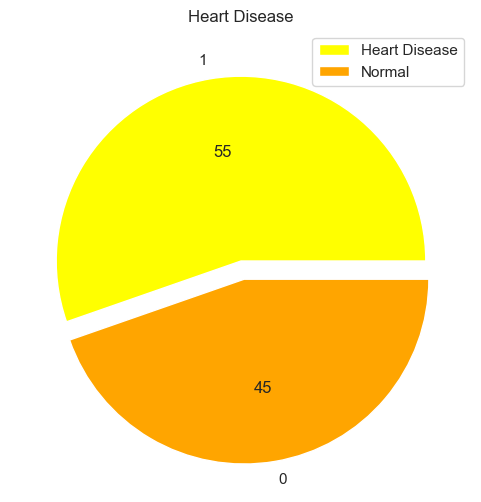

In [13]:
labels=['1','0']
count= data['HeartDisease'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(count,labels=labels,autopct='%.0f',explode=(0,.1), colors=['yellow','orange'])
plt.legend( ['Heart Disease','Normal'],loc =1)

plt.title('Heart Disease')
plt.show()

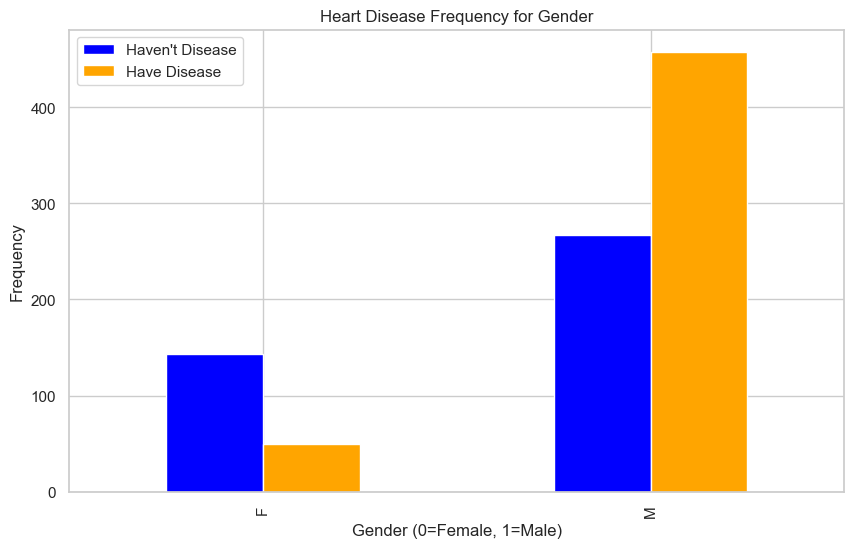

In [14]:
# Heart Disease Frequency for Gender
pd.crosstab(data.Sex, data.HeartDisease).plot(kind="bar", figsize=(10, 6), color=['blue', 'orange'])
plt.title("Heart Disease Frequency for Gender")
plt.xlabel("Gender (0=Female, 1=Male)")
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

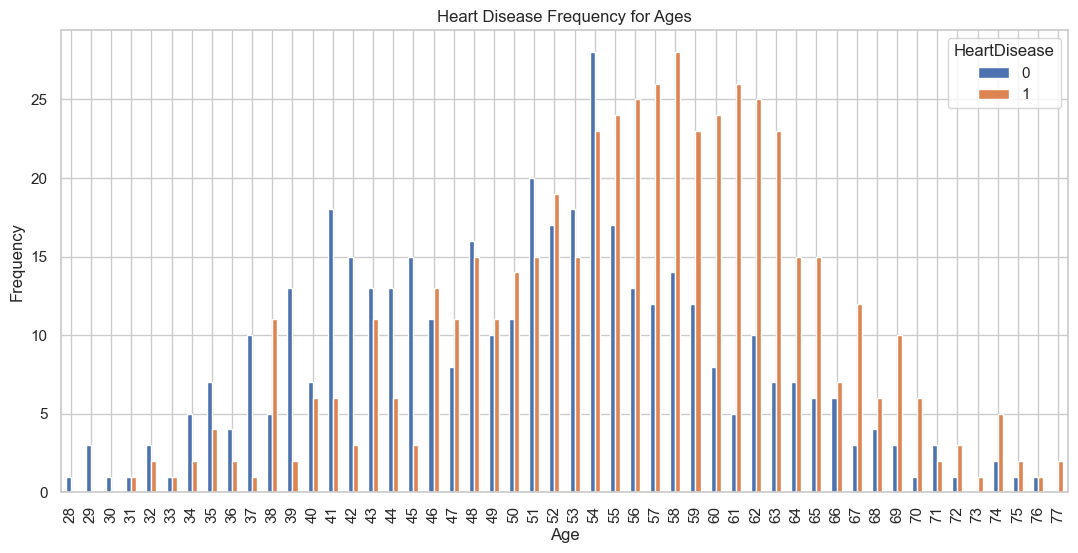

In [15]:
# heart Disease Frequency for Ages
pd.crosstab(data.Age,data.HeartDisease).plot(kind="bar",figsize=(13,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig('heart_Disease_and_Ages.png')
plt.show()

HeartDisease          0         1
ChestPainType                    
ASY            0.209677  0.790323
ATA            0.861272  0.138728
NAP            0.645320  0.354680
TA             0.565217  0.434783


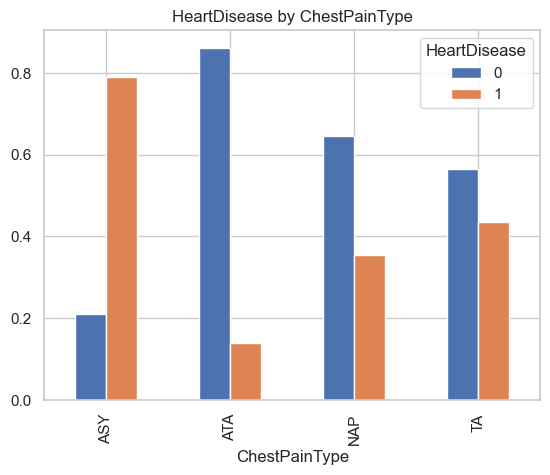

In [16]:
chest_heart = pd.crosstab(data['ChestPainType'], data['HeartDisease'],normalize='index')
print(chest_heart)
chest_heart.plot(kind='bar')
plt.title('HeartDisease by ChestPainType')
plt.show()

HeartDisease         0         1
RestingECG                      
LVH           0.436170  0.563830
Normal        0.483696  0.516304
ST            0.342697  0.657303


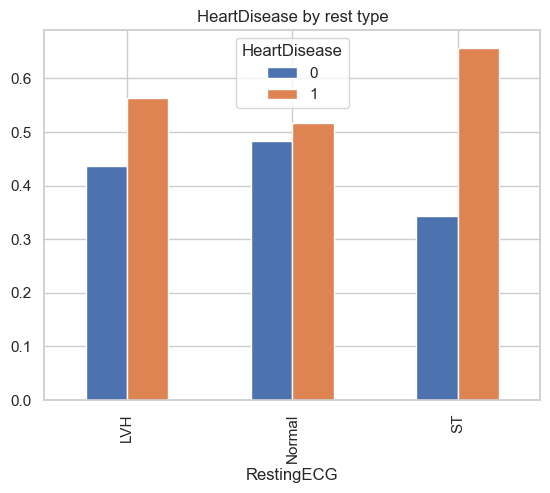

In [17]:
rest_heart = pd.crosstab(data['RestingECG'], data['HeartDisease'],normalize='index')
print(rest_heart)
rest_heart.plot(kind='bar')
plt.title('HeartDisease by rest type')
plt.show()

HeartDisease           0         1
ExerciseAngina                    
N               0.648995  0.351005
Y               0.148248  0.851752


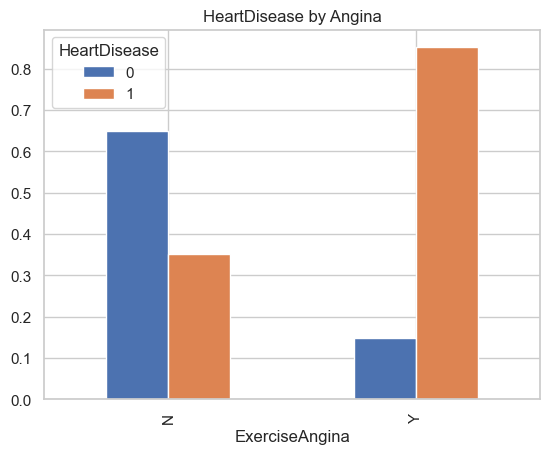

In [18]:
angina_heart = pd.crosstab(data['ExerciseAngina'], data['HeartDisease'],normalize='index')
print(angina_heart)
angina_heart.plot(kind='bar')
plt.title('HeartDisease by Angina')
plt.show()

HeartDisease         0         1
ST_Slope                        
Down          0.222222  0.777778
Flat          0.171739  0.828261
Up            0.802532  0.197468


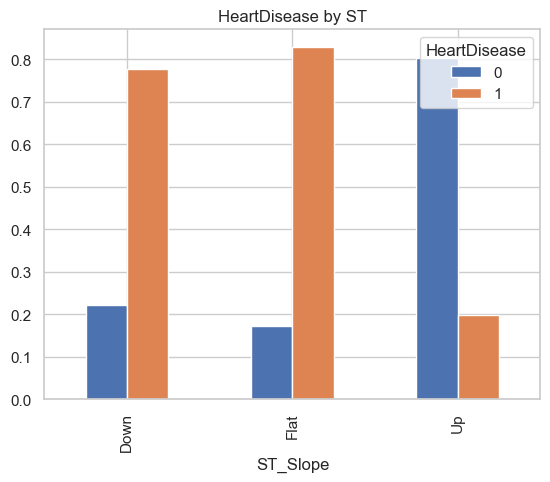

In [19]:
st_heart = pd.crosstab(data['ST_Slope'], data['HeartDisease'],normalize='index')
print(st_heart)
st_heart.plot(kind='bar')
plt.title('HeartDisease by ST')
plt.show()

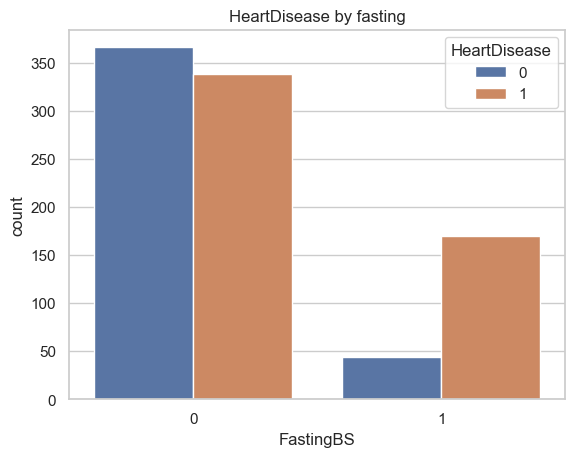

In [20]:
sns.countplot(x='FastingBS', data=data, hue='HeartDisease')
plt.title('HeartDisease by fasting')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

###  Categorical to Numeric Conversion for Predictive Modeling

In [22]:
#Due to the clear correlation of some categorical variables on heart disease (see swarmplots above), they are
#converted to numeric variables below in order to include them in the predictive model. 

data['Sex'] = pd.factorize(data['Sex'])[0]
data['ChestPainType'] = pd.factorize(data['ChestPainType'])[0]
data['RestingECG'] = pd.factorize(data['RestingECG'])[0]
data['ExerciseAngina'] = pd.factorize(data['ExerciseAngina'])[0]
data['ST_Slope'] = pd.factorize(data['ST_Slope'])[0]
print(data)

     Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              0        140          289          0           0   
1     49    1              1        160          180          0           0   
2     37    0              0        130          283          0           1   
3     48    1              2        138          214          0           0   
4     54    0              1        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              3        110          264          0           0   
914   68    0              2        144          193          1           0   
915   57    0              2        130          131          0           0   
916   57    1              0        130          236          0           2   
917   38    0              1        138          175          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  Hear

## Building Classification Models

In [23]:
# Logistic Regression
X = data.drop("HeartDisease", axis=1) #Selection of variables to be used in the predictive model
y = data["HeartDisease"] #Selection of the variable to be predicted

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 40)
lr=LogisticRegression(class_weight=None, random_state=101, solver='saga', max_iter=10000)

lrmodel=lr.fit(X_train,y_train)
lrpred=lrmodel.predict(X_test)
lraccuracy = accuracy_score(y_test,lrpred)
lrcoefficients = lr.coef_[0]

print(f'The accuracy of the Logistic Regression model is: {lraccuracy}')
# List of coefficients that indicate the contribution of each variable to the predictive model, following 
# the order of the variables in the dataframe X 
print(f'The coefficients of the Logistic Regression model are: {lrcoefficients}') 

The accuracy of the Logistic Regression model is: 0.8586956521739131
The coefficients of the Logistic Regression model are: [ 0.01487524 -0.42172034  0.65406445  0.00275275 -0.00306944  0.41068964
  0.0434508  -0.01807354  0.61483942  0.49715241  0.84304473]


### Model Improvement

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Drop less important features based on random forest feature importance
selected_features = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 
                     'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

X = data[selected_features]
y = data["HeartDisease"]

# One-hot encode categorical variables
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_cols)],
    remainder='passthrough'
)
X_encoded = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.20, random_state=40)

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(random_state=101, solver='saga', max_iter=10000), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_lr_model = LogisticRegression(random_state=101, solver='saga', max_iter=10000, **best_params)
best_lr_model.fit(X_train, y_train)

# Evaluate the model
best_lr_pred = best_lr_model.predict(X_test)
best_lr_accuracy = accuracy_score(y_test, best_lr_pred)

print(f'The accuracy of the Logistic Regression model after improvement is: {best_lr_accuracy}')
print(f'Best hyperparameters: {best_params}')


The accuracy of the Logistic Regression model after improvement is: 0.8913043478260869
Best hyperparameters: {'C': 10, 'penalty': 'l1'}


In [25]:
# Random Forest
# Note: although the Random Forest model shows the same accuracy as Logistic Regression, the latter has the 
# advantage of being very easy to interpret via a list of coefficients which indicate the contribution of each
# variable to the predictive model.

rf = RandomForestClassifier(n_estimators=30, criterion = 'entropy', random_state=50, class_weight='balanced', max_depth=5)
rfmodel = rf.fit(X_train, y_train)
rfpred=rfmodel.predict(X_test)
rfaccuracy = accuracy_score(y_test,rfpred)
print(f'The accuracy of the Random Forest model is: {rfaccuracy}')

The accuracy of the Random Forest model is: 0.875


In [26]:
# Decision Tree 
decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state=50, class_weight=None)
dcmodel = decision_tree.fit(X_train, y_train)
dcpred = dcmodel.predict(X_test)
dcaccuracy = accuracy_score(y_test,dcpred)
print(f'The accuracy of the Decision Tree model is: {dcaccuracy}')

The accuracy of the Decision Tree model is: 0.8260869565217391


In [27]:
# K-Nearest Neighbors Classifier (KNN)
knn = KNeighborsClassifier()
knnmodel = knn.fit(X_train, y_train) 
knnpred = knnmodel.predict(X_test)
knnaccuracy = accuracy_score(y_test,knnpred)
print(f'The accuracy of the KNN model is: {knnaccuracy}')

The accuracy of the KNN model is: 0.7336956521739131


In [28]:
# Support Vector Classifier (SVC)
svc = SVC(random_state=101, class_weight=None)
svc.fit(X_train, y_train) 
svcmodel = svc.fit(X_train, y_train) 
svcpred = svcmodel.predict(X_test)
svcaccuracy = accuracy_score(y_test,svcpred)
print(f'The accuracy of the SVC model is: {svcaccuracy}')



The accuracy of the SVC model is: 0.7391304347826086


In [29]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = data.drop("HeartDisease", axis=1)
scaled_features = scaler.fit_transform(features)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_features, data["HeartDisease"], test_size=0.2)


In [31]:
model = LinearRegression()
model.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score

# For example, applying 5-fold cross-validation on the Logistic Regression model
cv_scores = cross_val_score(lrmodel, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.79891304 0.81521739 0.79891304 0.79781421 0.75956284]
Mean cross-validation score: 0.7940841054882395


Accuracy: 0.8532608695652174
Precision: 0.8469387755102041
Recall: 0.8736842105263158
F1 Score: 0.8601036269430051


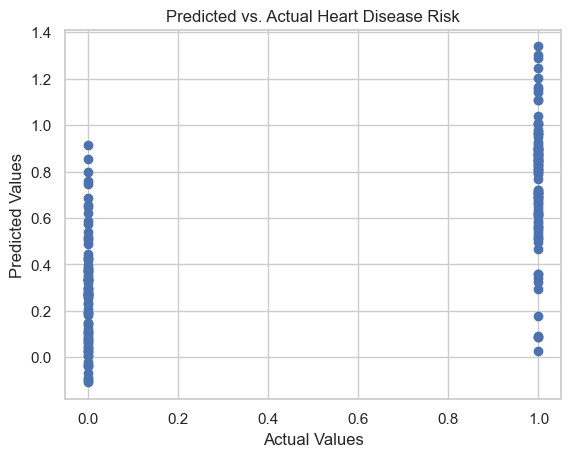

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on test data
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred.round())
precision = precision_score(y_test, y_pred.round())
recall = recall_score(y_test, y_pred.round())
f1 = f1_score(y_test, y_pred.round())

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Plot predicted vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. Actual Heart Disease Risk")
plt.show()

## Making Predictions

In [33]:
def predict_heart_disease(model, scaler, feature_names):
    # User input
    Age = float(input("Enter your age: "))
    Sex = int(input("Enter your sex (0 for male, 1 for female): "))
    ChestPainType = int(input("Enter your chest pain type (0-ATA, 1-NAP, 2-ASY, 3-TA): "))
    RestingBP = float(input("Enter your resting blood pressure: "))
    Cholesterol = float(input("Enter your serum cholesterol: "))
    FastingBS = int(input("Enter your fasting blood sugar (0 for <120, 1 for >120): "))
    RestingECG = int(input("Enter the Resting electrocardiogram results (0 for Normal, 1 for ST, 2 for LVH): "))
    MaxHR = int(input("Enter your maximum heart rate: "))
    ExerciseAngina = int(input("Enter your exercise induced angina (0 for yes, 1 for no): "))
    Oldpeak = float(input("Enter your ST depression induced by exercise relative to rest: "))
    ST_Slope = int(input("Enter the slope of the peak exercise ST segment (0 for Up, 1 for Flat, 2 for Down): "))

    # Create a dataframe with user input
    user_data = pd.DataFrame({
        'Age': [Age],
        'Sex': [Sex],
        'ChestPainType': [ChestPainType],
        'RestingBP': [RestingBP],
        'Cholesterol': [Cholesterol],
        'FastingBS': [FastingBS],
        'RestingECG': [RestingECG],
        'MaxHR': [MaxHR],
        'ExerciseAngina': [ExerciseAngina],
        'Oldpeak': [Oldpeak],
        'ST_Slope': [ST_Slope]
    })
    
    # Scale numerical features
    scaled_user_data = scaler.transform(user_data)

    # Create a dataframe with scaled data and correct feature names
    scaled_user_df = pd.DataFrame(scaled_user_data, columns=feature_names)
    
    # Make prediction using the Logistic Regression model
    prediction = model.predict(scaled_user_df)
    
    # Interpret prediction
    if prediction[0] == 1:
        print("You are at risk of heart disease.")
    else:
        print("You seem to be healthy!")

# Call the function to make predictions
predict_heart_disease(lrmodel, scaler, X.columns.tolist())


Enter your age: 56
Enter your sex (0 for male, 1 for female): 0
Enter your chest pain type (0-ATA, 1-NAP, 2-ASY, 3-TA): 0
Enter your resting blood pressure: 122
Enter your serum cholesterol: 324
Enter your fasting blood sugar (0 for <120, 1 for >120): 1
Enter the Resting electrocardiogram results (0 for Normal, 1 for ST, 2 for LVH): 1
Enter your maximum heart rate: 135
Enter your exercise induced angina (0 for yes, 1 for no): 0
Enter your ST depression induced by exercise relative to rest: 1
Enter the slope of the peak exercise ST segment (0 for Up, 1 for Flat, 2 for Down): 1
You seem to be healthy!


## Feature Importance Analysis

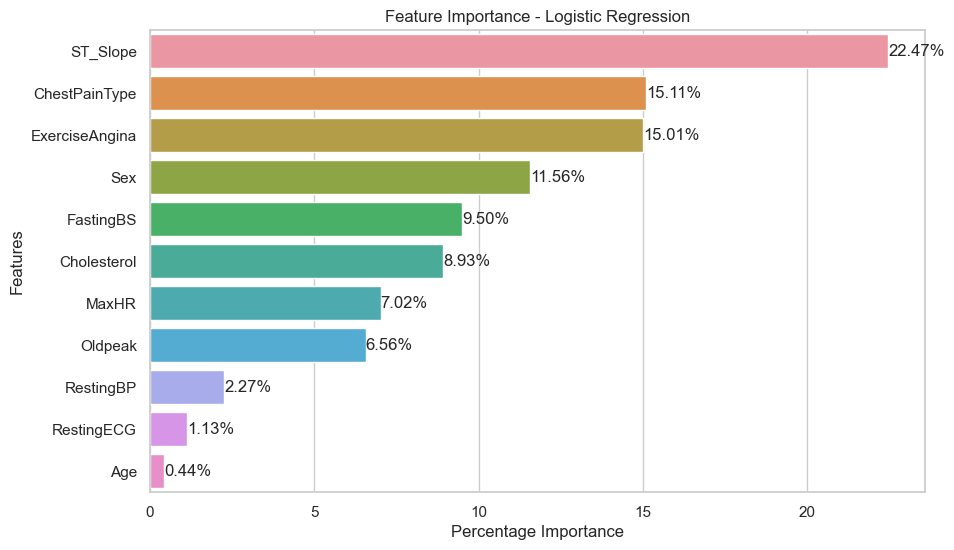


Feature Importance Rankings:
1. ST_Slope: 22.47%
2. ChestPainType: 15.11%
3. ExerciseAngina: 15.01%
4. Sex: 11.56%
5. FastingBS: 9.50%
6. Cholesterol: 8.93%
7. MaxHR: 7.02%
8. Oldpeak: 6.56%
9. RestingBP: 2.27%
10. RestingECG: 1.13%
11. Age: 0.44%


In [34]:
import pickle
from sklearn.linear_model import LogisticRegression

# Logistic Regression model with increased max_iter
logistic_model = LogisticRegression(max_iter=1000)  # Increase the max_iter parameter
logistic_model.fit(X_train, y_train)

with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)
# Get feature importances from logistic regression coefficients
feature_importances = np.abs(logistic_model.coef_[0])

# Calculate total importance
total_importance = np.sum(feature_importances)

# Calculate percentage importance for each feature
percentage_importances = (feature_importances / total_importance) * 100

feature_names = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 
                 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

# Sort indices based on feature importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_indices]

# Plot the feature importance
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=percentage_importances[sorted_indices], y=sorted_features)
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Percentage Importance')
plt.ylabel('Features')

# Add numerical values alongside the graphical representation
for i, percentage in enumerate(percentage_importances[sorted_indices]):
    ax.text(percentage, i, f'{percentage:.2f}%', ha='left', va='center')

plt.show()

# Display feature importance rankings as text with percentage importance
print("\nFeature Importance Rankings:")
for rank, idx in enumerate(sorted_indices, start=1):
    feature = feature_names[idx]
    percentage = percentage_importances[idx]
    print(f"{rank}. {feature}: {percentage:.2f}%")
